In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from datetime import datetime

# Set colors
dc_colors = ["#2B3A64", "#96aae3", "#C3681D", "#EFBD95", "#E73F74", "#80BA5A", "#E68310", "#008695", "#CF1C90", "#f97b72", "#4b4b8f", "#A5AA99"]

# Set template
pio.templates["dc"] = go.layout.Template(
    layout=dict(
    	font={"family": "Poppins, Sans-serif", "color": "#505050"},
        title={"font": {"family": "Poppins, Sans-serif", "color": "black"}, "yanchor": "top", "y": 0.92, "xanchor": "left", "x": 0.025},
    	plot_bgcolor="white",
    	paper_bgcolor="white",
    	hoverlabel=dict(bgcolor="white"),
    	margin=dict(l=100, r=50, t=75, b=70),
        colorway=dc_colors,
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=True, 
                   gridwidth=0.1, 
                   gridcolor='lightgrey', 
                   showline=True,
                   nticks=10,
                   linewidth=1, 
                   linecolor='black', 
                   rangemode="tozero")
    )
) 

In [ ]:
# Import yfinance
import yfinance as yf

# Set the date range
start = "2020-01-01"
stop = "2023-02-01"


# Set the ticker we want to use (GameStop)
ticker = "GME"

# Get the data for the ticker GME, use multi_level_index=False
gme = yf.download(ticker, start, stop, multi_level_index=False)

# Preview DataFrame
gme

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,1.577500,1.617500,1.517500,1.535000,17814400
2020-01-03,1.470000,1.562500,1.460000,1.552500,14175600
2020-01-06,1.462500,1.477500,1.400000,1.450000,13579200
2020-01-07,1.380000,1.457500,1.360000,1.442500,20912000
2020-01-08,1.430000,1.462500,1.352500,1.372500,22517600
...,...,...,...,...,...
2023-01-25,20.230000,20.840000,19.530001,20.590000,3515800
2023-01-26,20.010000,21.170000,19.379999,20.610001,3520000
2023-01-27,22.820000,23.309999,19.410000,19.799999,11897200


In [ ]:
gme.describe()

,Close,High,Low,Open,Volume
count,776.000000,776.000000,776.000000,776.000000,7.760000e+02
mean,24.452030,25.939124,23.237738,24.562152,3.110780e+07
std,18.981395,20.480236,17.971932,19.209501,7.076838e+07
min,0.700000,0.735000,0.642500,0.712500,1.122700e+06
25%,2.634375,2.787500,2.506875,2.640625,6.793800e+06
50%,26.115000,27.490000,25.133750,26.085000,1.257080e+07
75%,39.628749,40.998749,37.886249,39.750000,2.489090e+07
max,86.877502,120.750000,72.877502,94.927498,7.886316e+08


In [ ]:
fig = px.line(gme,
             x=gme.index,
             y="Close",
             template = "dc",
             title = "GameStop Closing Price (daily)"
            )
fig.show()

In [ ]:
# create a filtered DataFrame for early 2021
gme_2021 = gme["2021-01": "2021-03"]

# Create a Plotly Figure
fig = px.line(gme_2021,
              x=gme_2021.index,
              y="Close",
              template="dc",
              title="GameStop Closing Price (early 2021)"
             )

# Define three key events
short = datetime.strptime("2021-01-11", "%Y-%m-%d").timestamp() * 1000
robinhood = datetime.strptime("2021-01-28", "%Y-%m-%d").timestamp() * 1000
late_feb = datetime.strptime("2021-02-23", "%Y-%m-%d").timestamp() * 1000

# Add these as lines
fig.add_vline(x=short, line_width=0.8, annotation_text="r/wallstreetbets")
fig.add_vline(x=robinhood, line_width=0.8, annotation_text="Robinhood")
fig.add_vline(x=late_feb, line_width=0.8, annotation_text="Memes")

fig.show()

In [ ]:
# Define the candlestick data
candlestick = go.Candlestick(
    x=gme.index,
    open=gme["Open"],
    high=gme["High"],
    low=gme["Low"],
    close=gme["Close"]
)

fig = go.Figure(data=candlestick)
fig.update_layout(title="GME Prices (Candlestick)", template="dc")

fig.show()

In [ ]:
# Calculate the 28days rolling mean price
gme_rolling = gme.rolling("28D").mean()

# Create a Plotly Figure
fig = px.line(gme_rolling,
              x=gme_rolling.index,
              y="Close",
              template="dc",
              title="GameStop Closing Price (rolling 28 day mean)"
)
fig.show()

In [ ]:
#Get the data for the ticker GSPC
sp = yf.download("^GSPC", start, stop, multi_level_index=False)

#rename close columns
sp = sp.rename(columns={"Close": "S&P Close"})
gme = gme.rename(columns={"Close": "GameStop Close"})

#concatenate the data
all_data = pd.concat([gme["GameStop Close"], sp["S&P Close"]], axis=1)

all_data

[*********************100%***********************]  1 of 1 completed


,GameStop Close,S&P Close
Date,,
2020-01-02,1.577500,3257.850098
2020-01-03,1.470000,3234.850098
2020-01-06,1.462500,3246.280029
2020-01-07,1.380000,3237.179932
2020-01-08,1.430000,3253.050049
...,...,...
2023-01-25,20.230000,4016.219971
2023-01-26,20.010000,4060.429932
2023-01-27,22.820000,4070.560059


In [ ]:
# Select first prices
first_prices = all_data.iloc[0]

#Create normalized_prices
normalized_price = all_data.div(first_prices).mul(100)

normalized_price

,GameStop Close,S&P Close
Date,,
2020-01-02,100.000000,100.000000
2020-01-03,93.185423,99.294013
2020-01-06,92.709983,99.644856
2020-01-07,87.480191,99.365527
2020-01-08,90.649760,99.852662
...,...,...
2023-01-25,1282.408857,123.278231
2023-01-26,1268.462784,124.635260
2023-01-27,1446.592704,124.946205


In [ ]:
# Melt the Dataframe to assist with plotting
normalized_melt = normalized_price.reset_index().melt(id_vars="Date", var_name="Ticker", value_name="Closing Price")

normalized_melt

,Date,Ticker,Closing Price
0,2020-01-02,GameStop Close,100.000000
1,2020-01-03,GameStop Close,93.185423
2,2020-01-06,GameStop Close,92.709983
3,2020-01-07,GameStop Close,87.480191
4,2020-01-08,GameStop Close,90.649760
...,...,...,...
1547,2023-01-25,S&P Close,123.278231
1548,2023-01-26,S&P Close,124.635260
1549,2023-01-27,S&P Close,124.946205
1550,2023-01-30,S&P Close,123.325810


In [ ]:
fig = px.line(normalized_melt,
              x="Date",
              y="Closing Price",
              color="Ticker",
              template="dc",
              title="GameStop vs S&P 500 Closing Price (normalized)"
)
fig.show()

In [ ]:
# Get recent data for GME
gme_recent = yf.download("GME", "2023-01-01", "2023-02-21", multi_level_index=False)
gme_recent

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,17.200001,19.260000,17.090000,18.639999,5135200
2023-01-04,17.320000,17.930000,16.900000,17.250000,3939300
2023-01-05,16.219999,17.260000,15.890000,17.059999,6066200
2023-01-06,16.459999,16.570000,15.410000,16.000000,4823400
2023-01-09,16.379999,17.129999,16.360001,16.650000,3522600
2023-01-10,17.770000,18.090000,16.250000,16.299999,4402800
2023-01-11,19.040001,20.049999,17.860001,18.190001,8405800
2023-01-12,20.629999,20.629999,18.340000,19.040001,5877300
2023-01-13,20.490000,21.110001,19.799999,19.879999,5494400


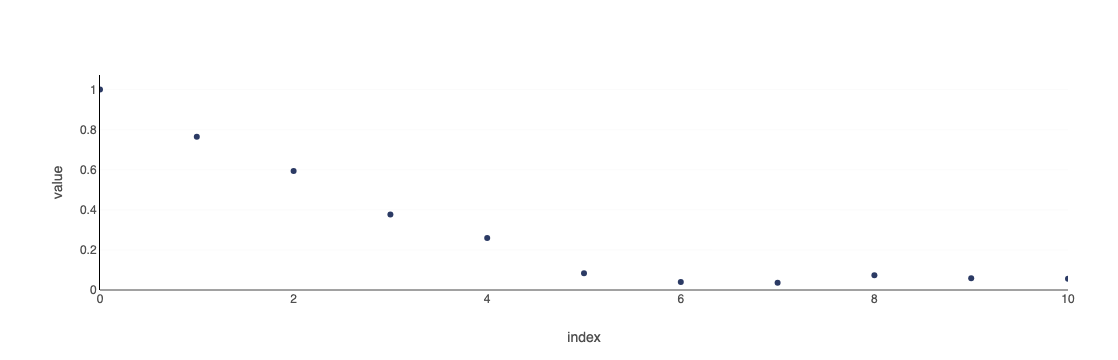

In [ ]:
# Import acf
from statsmodels.tsa.stattools import acf

#calculate the arf array for the recent Gamestop data
acf_array = acf(gme_recent["Close"], nlags=10)

# Generate a scatter plot
fig = px.scatter(acf_array, template="dc")

#fix the range and layout
fig.update_xaxes(range=[0,10])
fig.update_layout(showlegend=False)

fig.show()

In [ ]:
# Set the index to the correct period
gme_recent.index = pd.DatetimeIndex(gme_recent.index)
new_index = pd.date_range(start=gme_recent.index[0], end=gme_recent.index[-1], freq='B')
gme_recent = gme_recent.reindex(new_index)

In [ ]:
# Making Simple Forecasts
#- Finally, we are going to fit a model to the GameStop data up until the first of February and make a forecast. We are going to use an AR(1) model.
#- An AR(1) model calculates the current value as a mean plus a fraction (  ) of yesterday's value and some noise.
   # - If  is 0 then the process is just noise.
  # - If  is 1 then the process is a random walk.

In [ ]:
# Import the ARIMA Class

from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the data
mod = ARIMA(gme_recent["Close"], order=(1, 0, 0))
res = mod.fit()

# print the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   34
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -52.228
Date:                Sun, 27 Apr 2025   AIC                            110.455
Time:                        22:11:56   BIC                            115.035
Sample:                    01-03-2023   HQIC                           112.017
                         - 02-17-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1466      0.882     22.838      0.000      18.418      21.876
ar.L1          0.8186      0.107      7.668      0.000       0.609       1.028
sigma2         1.3209      0.362      3.649      0.000       0.611       2.030
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.65   Prob(JB):                         0.76
Heteroskedasticity (H):               1.27   Skew:                             0.26
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

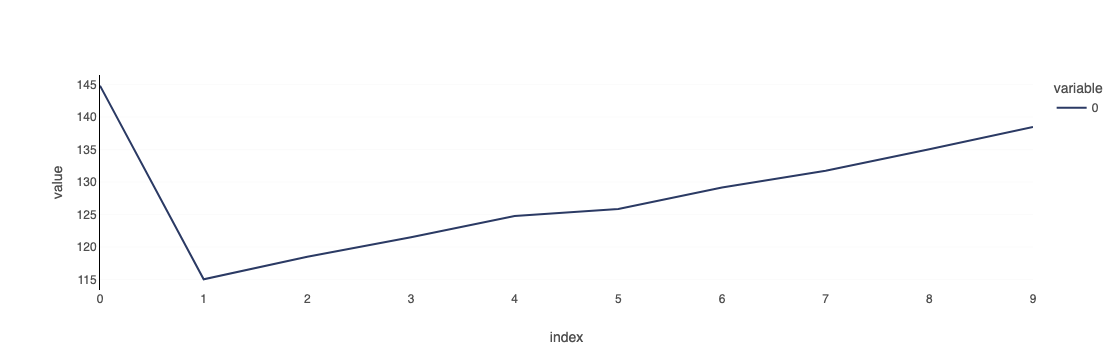

In [ ]:
# initialize an empty array
bic = []

# loop through a range of AR models and get the BIC
for i in range(0, 10):
    mod = ARIMA(gme_recent["Close"], order=(i, 0, 0))
    res = mod.fit()
    bic.append(res.bic)

#plot the BIC
fig = px.line(bic, template="dc")
fig.update_yaxes(rangemode="normal")

fig.show()

In [ ]:
#Get Data Up until a week ago
gme_recent_trunc = gme_recent[:"2023-02-09"]

#Estimate an AR(1) model
mod = ARIMA(gme_recent_trunc["Close"], order=(1, 0,0))

# create the forecast as ad Dataframe
preds = res.get_forecast(steps=7).summary_frame()

#view the forecasts
preds

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-02-20,21.699469,1.053838,19.633984,23.764954
2023-02-21,21.874747,1.350080,19.228640,24.520854
2023-02-22,21.111011,1.568030,18.037730,24.184293
2023-02-23,20.692991,1.668041,17.423690,23.962292
2023-02-24,20.266024,1.813169,16.712279,23.819770
2023-02-27,20.232992,1.849619,16.607806,23.858178
2023-02-28,20.081666,1.856633,16.442732,23.720600


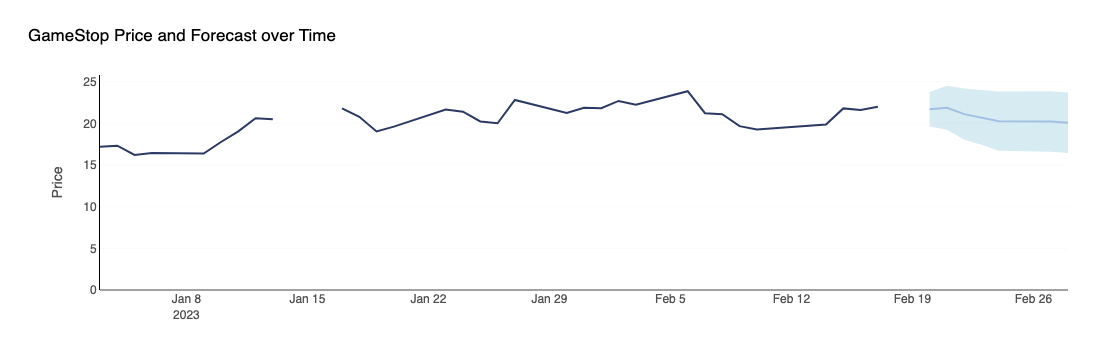

In [ ]:
import plotly.graph_objects as go

# Create a figure containing predicted, real, and CI values
fig = go.Figure([
    go.Scatter(
        name='True value',
        x=gme_recent.index,
        y=gme_recent["Close"],
        mode='lines'
    ),
    go.Scatter(
        name='Predicted value',
        x=preds.index,
        y=preds["mean"],
        mode='lines'
    ),
    go.Scatter(
        name='Upper',
        x=preds.index,
        y=preds["mean_ci_upper"],
        mode='lines',
        line=dict(color='lightblue', width=0)
    ),
    go.Scatter(
        name='Lower',
        x=preds.index,
        y=preds["mean_ci_lower"],
        mode='lines',
        line=dict(color='lightblue', width=0),
        fill="tonexty"
    ),
])

# Update the layout and show the plot
fig.update_layout(
    yaxis_title='Price',
    title='GameStop Price and Forecast over Time',
    showlegend=False,
    template="dc"  # optional: "dc" template may not exist; "plotly_white" is safe
)

fig.show()
